In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_16.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [5]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


{'pred_probs': array([0.03489287, 0.07568364, 0.1259303 , 0.17540789, 0.22487174,
        0.27479707, 0.32283644, 0.36796416, 0.41358285]),
 'emp_probs': array([0.00213068, 0.00768836, 0.01688312, 0.02963241, 0.02966715,
        0.04733253, 0.05682422, 0.04681648, 0.06122449]),
 'bin_counts': array([1408., 1951., 2310., 2666., 2764., 2493., 1883.,  534.,   49.])}

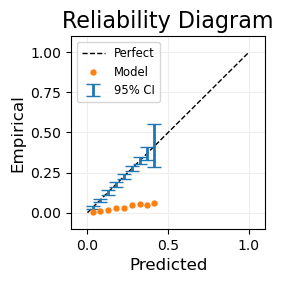

In [7]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)
 

mli.plot_reliability_diagram(M_test2['golds'], tp2)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [11]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [12]:
pos = pos_1
subneg = np.random.choice( neg_1, 3*sum(gold1))
p_test = tp1
y_test = M_test1['golds']
synth_size = 5


In [13]:
def iso_smote(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    #many_pos = np.concatenate((pos, synth_pos))
    many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold)
    iso_test = iso.predict(    ( p_test) )

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  iso_test)
    return iso_test

array([0.29272794, 0.03      , 0.42630058, ..., 0.24914676, 0.33405405,
       0.33094319])

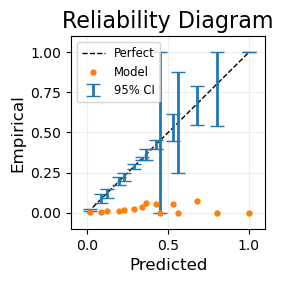

In [21]:
iso_smote(pos_1, subneg=np.random.choice(neg_1, 35*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=12)

array([0.37759611, 0.07978723, 0.3993994 , ..., 0.37759611, 0.18888479,
       0.37759611])

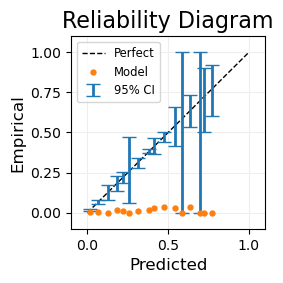

In [25]:
iso_smote(pos_2, subneg=np.random.choice(neg_2, 35*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=15)

array([0.37748344, 0.10430839, 0.39099099, ..., 0.39099099, 0.25      ,
       0.39099099])

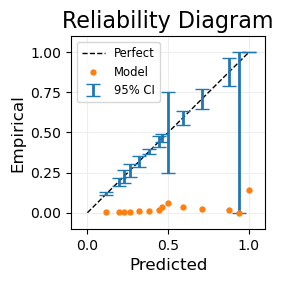

In [30]:
iso_smote(pos_3, subneg=np.random.choice(neg_3, 30*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=15)

array([0.17307692, 0.05502392, 0.20758123, ..., 0.17307692, 0.13970588,
       0.13970588])

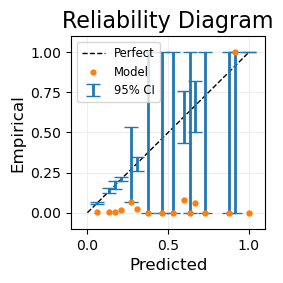

In [31]:
iso_smote(pos_4, subneg=np.random.choice(neg_4, 25*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=4.5)